In [1]:
# % matplotlib inline

import os
import os.path as pth

import matplotlib.image as img
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import InceptionResNetV2

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from scipy import stats
from PIL import Image 
import cv2

print(tf.__version__)

2.2.0


In [2]:

df_cloth_attr = pd.read_csv('./data/for_prediction/labeling/list_attr_cloth.txt', sep='\s+\s+', skiprows=1)
display(df_cloth_attr)
df_cloth_category = pd.read_csv('./data/for_prediction/labeling/list_category_cloth.txt', sep='\s+\s+', skiprows=1)
display(df_cloth_category)


df_cloth_category_path = pd.read_csv('./data/for_prediction/labeling/list_category_img.txt', sep='\s+', skiprows=1)
display(df_cloth_category_path)
df_cloth_bbox = pd.read_csv('./data/for_prediction/labeling/list_bbox.txt', sep='\s+', skiprows=1)
display(df_cloth_bbox)

/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,attribute_name,attribute_type
0,a-line,3
1,abstract,1
2,abstract chevron,1
3,abstract chevron print,1
4,abstract diamond,1
...,...,...
995,zip-pocket,4
996,zip-up,4
997,zipped,4
998,zipper,4


/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,category_name,category_type
0,Anorak,1
1,Blazer,1
2,Blouse,1
3,Bomber,1
4,Button-Down,1
5,Cardigan,1
6,Flannel,1
7,Halter,1
8,Henley,1
9,Hoodie,1


,image_name,category_label
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3
...,...,...
289217,img/Paisley_Print_Babydoll_Dress/img_00000050.jpg,41
289218,img/Paisley_Print_Babydoll_Dress/img_00000051.jpg,41
289219,img/Paisley_Print_Babydoll_Dress/img_00000052.jpg,41
289220,img/Paisley_Print_Babydoll_Dress/img_00000053.jpg,41


,image_name,x_1,y_1,x_2,y_2
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,72,79,232,273
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,67,59,155,161
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,65,65,156,200
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,51,62,167,182
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,46,88,166,262
...,...,...,...,...,...
289217,img/Paisley_Print_Babydoll_Dress/img_00000050.jpg,1,1,300,300
289218,img/Paisley_Print_Babydoll_Dress/img_00000051.jpg,14,58,225,277
289219,img/Paisley_Print_Babydoll_Dress/img_00000052.jpg,18,41,149,230
289220,img/Paisley_Print_Babydoll_Dress/img_00000053.jpg,75,47,220,300


In [3]:
df_cloth_attr_path = pd.read_csv('./data/for_prediction/labeling/list_attr_img.txt', sep='\s+', skiprows=2, header = None)
display(df_cloth_attr_path)

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289217,img/Paisley_Print_Babydoll_Dress/img_00000050.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
289218,img/Paisley_Print_Babydoll_Dress/img_00000051.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
289219,img/Paisley_Print_Babydoll_Dress/img_00000052.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
289220,img/Paisley_Print_Babydoll_Dress/img_00000053.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [4]:
print(df_cloth_attr_path.iloc[1])
basic_path = './data/for_prediction/'

filepath = basic_path+df_cloth_attr_path.iloc[1][0]
print(filepath)

0       img/Sheer_Pleated-Front_Blouse/img_00000002.jpg
1                                                    -1
2                                                    -1
3                                                    -1
4                                                    -1
                             ...                       
996                                                  -1
997                                                  -1
998                                                  -1
999                                                  -1
1000                                                 -1
Name: 1, Length: 1001, dtype: object
./data/for_prediction/img/Sheer_Pleated-Front_Blouse/img_00000002.jpg


(205, 300)
JPEG


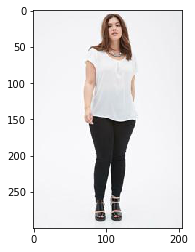

In [5]:

img = Image.open(filepath)
print(img.size)
print(img.format)

npimg = np.array(img)
plt.imshow(npimg)

./data/for_prediction/img/Sheer_Pleated-Front_Blouse/img_00000002.jpg
image_name    img/Sheer_Pleated-Front_Blouse/img_00000002.jpg
x_1                                                        67
y_1                                                        59
x_2                                                       155
y_2                                                       161
Name: 1, dtype: object
(67, 59, 155, 161)


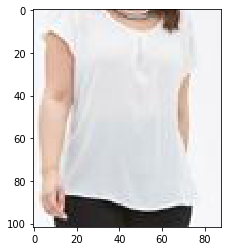

In [6]:
print(filepath)
print(df_cloth_bbox.iloc[1])

img_box = (df_cloth_bbox.iloc[1]['x_1'], df_cloth_bbox.iloc[1]['y_1'], df_cloth_bbox.iloc[1]['x_2'], df_cloth_bbox.iloc[1]['y_2'])
print(img_box)

crop_img = img.crop(img_box)
npcrop_img = np.array(crop_img)
plt.imshow(npcrop_img)

./data/for_prediction/img/Ruffled_Floral_Print_Shorts/img_00000038.jpg
['beach', 'bermuda', 'floral', 'pineapple', 'pom-pom', 'print', 'ruffle', 'summer']


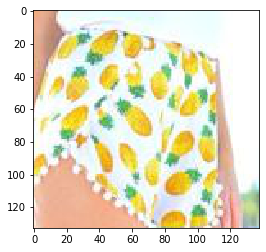

In [7]:
# 옷 이미지, 속성 보기 실험

def make_crop_easy(file_path, my_bbox_df):
    img = Image.open(file_path)
    crop_square = (my_bbox_df['x_1'], my_bbox_df['y_1'], my_bbox_df['x_2'], my_bbox_df['y_2'])
    
    crop_img = img.crop(crop_square)
    np_crop_img = np.array(crop_img)
    
    return np_crop_img



m=176663
filepath1 = basic_path+df_cloth_attr_path.iloc[m][0]
print(filepath1)
my_bbox = df_cloth_bbox.iloc[m]
# print(my_bbox)

plt.imshow(make_crop_easy(filepath1, my_bbox))

n = 0
my_cloth_attr = []
for i in df_cloth_attr_path.iloc[m]:
    # print(df.iloc[n-1][0], '     ', n, i)
    if i == 1:
        my_cloth_attr.append(df_cloth_attr.iloc[n-1][0])
    n += 1
    
print(my_cloth_attr)

(133, 138, 3)


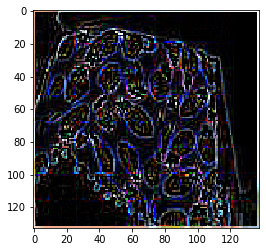

In [8]:
from PIL import ImageFilter

# 옷 ELA 실험

def make_crop_edge(file_path, my_bbox_df):
    img = Image.open(file_path)
    crop_square = (my_bbox_df['x_1'], my_bbox_df['y_1'], my_bbox_df['x_2'], my_bbox_df['y_2'])
    
    crop_img = img.crop(crop_square)
    image2 = crop_img.filter(ImageFilter.FIND_EDGES)
    np_crop_img = np.array(image2)
    
    return np_crop_img



npimg = make_crop_edge(filepath1, my_bbox)
print(npimg.shape)
plt.imshow(make_crop_edge(filepath1, my_bbox))


In [25]:
# 타입 별 속성들 확인 1,2,3,4,5
type_number = 5

# print(df_cloth_attr.loc[df_cloth_attr['attribute_type'] == type_number])
print(df_cloth_attr.loc[df_cloth_attr['attribute_type'] == type_number]['attribute_name'])

attr_list = []

for i in df_cloth_attr.loc[df_cloth_attr['attribute_type'] == type_number]['attribute_name']:
    attr_list.append(i)
    
print(attr_list)

16     americana
17       angeles
23           art
27      athletic
28        audrey
         ...    
986         yoga
987         yoke
988         york
989        youth
990     zeppelin
Name: attribute_name, Length: 230, dtype: object
['americana', 'angeles', 'art', 'athletic', 'audrey', 'babe', 'babydoll', 'barbie', 'baseball', 'basic', 'basquiat', 'beach', 'beatles', 'bed', 'bella', 'bike', 'biker', 'blah', 'blurred', 'boho', 'bold', 'boyfriend', 'brooklyn', 'brooklyn nets', 'california', 'camera', 'candy', 'cardio', 'cat', 'chic', 'cities', 'city', 'civil', 'classic', 'coast', 'coffee', 'cute', 'dainty', 'daring', 'dark', 'darling', 'defyant', 'desert', 'destroyed', 'devil', 'doll', 'doodle', 'dream', 'dreamcatcher', 'dreamer', 'dynamite', 'eagle', 'edge', 'eiffel', 'elegant', 'enchanted', 'ethereal', 'everyday', 'fan', 'fancy', 'festive', 'field', 'fisherman', 'flawless', 'flirty', 'floyd', 'fox', 'france', 'free spirit', 'fresh', 'frida', 'galaxy', 'garden', 'garden party', 'genu

 
43777
44049
46519
46657
46662
46690
46701
47943
54312
58267
59178
63291
63668
66290
67387
67900
75223
79133
80806
80892


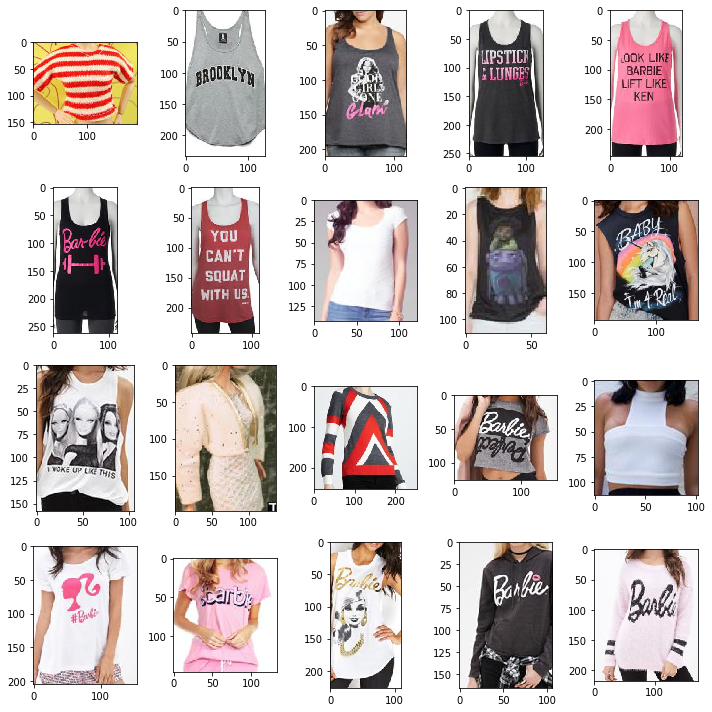

In [81]:

# print(df.index[df['attribute_name'] == 'crop'][0])
print(' ')

# 해당 타입의 옷 이미지 보기
fashion_attr = 'barbie'


def make_crop_edge(file_path, my_bbox_df):
    img = Image.open(file_path)
    crop_square = (my_bbox_df['x_1'], my_bbox_df['y_1'], my_bbox_df['x_2'], my_bbox_df['y_2'])
    
    crop_img = img.crop(crop_square)
    image2 = crop_img.filter(ImageFilter.FIND_EDGES)
    np_crop_img = np.array(image2)
    
    return np_crop_img

fig = plt.figure(figsize=(10,10))
axs = []

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))

n=0
for j in df_cloth_attr_path.index[df_cloth_attr_path[df_cloth_attr.index[df_cloth_attr['attribute_name'] == fashion_attr][0] + 1] == 1][10:]:
    print(j)
    axs[n].imshow(make_crop_easy(basic_path + df_cloth_attr_path.iloc[j][0], df_cloth_bbox.iloc[j]))
    
    n += 1
    if n == 20:
        break;
        

fig.tight_layout()
plt.show()

In [61]:
# 옷의 카테고리에 따라서 1,2,3
category_number = 3

# print(df_cloth_attr.loc[df_cloth_attr['attribute_type'] == type_number])
print(df_cloth_category.loc[df_cloth_category['category_type'] == category_number]['category_name'])

category_list = []

for i in df_cloth_category.loc[df_cloth_category['category_type'] == category_number]['category_name']:
    category_list.append(i)
    
print(category_list)

36        Caftan
37          Cape
38          Coat
39       Coverup
40         Dress
41      Jumpsuit
42        Kaftan
43        Kimono
44    Nightdress
45        Onesie
46          Robe
47        Romper
48    Shirtdress
49      Sundress
Name: category_name, dtype: object
['Caftan', 'Cape', 'Coat', 'Coverup', 'Dress', 'Jumpsuit', 'Kaftan', 'Kimono', 'Nightdress', 'Onesie', 'Robe', 'Romper', 'Shirtdress', 'Sundress']


,image_name,category_label
198672,img/Open-Knit_High-Slit_Maxi_Dress/img_0000000...,41
198673,img/Open-Knit_High-Slit_Maxi_Dress/img_0000000...,41
198674,img/Open-Knit_High-Slit_Maxi_Dress/img_0000000...,41
198675,img/Open-Knit_High-Slit_Maxi_Dress/img_0000000...,41
198676,img/Open-Knit_High-Slit_Maxi_Dress/img_0000000...,41
...,...,...
289217,img/Paisley_Print_Babydoll_Dress/img_00000050.jpg,41
289218,img/Paisley_Print_Babydoll_Dress/img_00000051.jpg,41
289219,img/Paisley_Print_Babydoll_Dress/img_00000052.jpg,41
289220,img/Paisley_Print_Babydoll_Dress/img_00000053.jpg,41


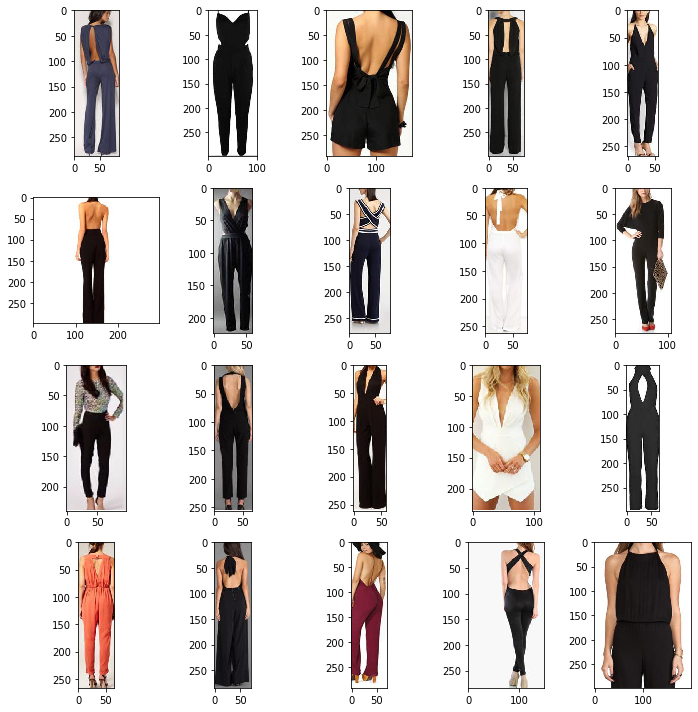

In [66]:

# print(df.index[df['attribute_name'] == 'crop'][0])
print(' ')

# 해당 속성의 옷 이미지 보기
fashion_category = 'Jumpsuit'

fig = plt.figure(figsize=(10,10))
axs = []

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))

n=0

display(df_cloth_category_path.loc[df_cloth_category_path['category_label'] == df_cloth_category.index[df_cloth_category['category_name'] == fashion_category][0]])

for j in df_cloth_category_path.index[df_cloth_category_path['category_label'] == df_cloth_category.index[df_cloth_category['category_name'] == fashion_category][0]+1]:
    # print(j)
    axs[n].imshow(make_crop_easy(basic_path + df_cloth_category_path.iloc[j][0], df_cloth_bbox.iloc[j]))
    
    n += 1
    if n == 20:
        break;
        

fig.tight_layout()
plt.show()